In [104]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
import numpy as np
from scipy.signal import argrelmax

import math
from itertools import takewhile

In [2]:
def format_exp (number, decimals=2):
    def exp_(f):
        return int(math.floor(math.log10(abs(f)))) if f != 0 else 0
    
    exponent = exp_(number)
    mantissa = number / 10**exponent
    
    return "%%.%if" % decimals % mantissa + "$\\times 10^{%s}$" % exponent

In [8]:
def read_file(folder_name = "./", file_name="B4_nt_B4_t%i.csv", num_threads=4, column_names = ["Energy", "Track_length"]):
    file_name = folder_name + file_name
    
    data = pd.read_csv (file_name % 0, comment="#", header=None, names=column_names)
    for i in range(1, num_threads):
        data = data.append(pd.read_csv (file_name % i, comment="#", header=None, names=column_names))
    
    return data

In [252]:
def SimpleHistogram(X, name=None, plot_peaks=False, alpha=None, label=None, do_texts=True, bin_num=200):
    vals, bins, _ = plt.hist(X, bin_num, alpha=alpha, label=label);
    
    #ignore 0 and photopeak
    ylim  = vals[1:-1].max() * 1.1
    x_max = X.max()
    
    plt.ylim(0,ylim)
    plt.xlabel("E absorbed [MeV]")
    plt.ylabel("# of events")
    
    if do_texts:
        if bins[0] == 0:
            plt.text(0     + 0.005, ylim * 0.9, "<- %s" % format_exp(vals[0]),  horizontalalignment='left',  fontsize=8)

        plt.text(x_max - 0.005, ylim * 0.9, "%s ->" % format_exp(vals[-1]), horizontalalignment='right', fontsize=8)
    
    if plot_peaks:
        plot_peaks(bins[:-1], vals, ylim)
    
    if name:
        plt.savefig(name + ".svg")

In [5]:
def plot_peaks(x, y, ylim, diff=100, order=50):
    
    inds = argrelmax(y, order=order)[0]
    
    for ind in inds:
        plt.text(x[ind], min(y[ind], ylim)*0.9, "E = %.2f ->" % x[ind], horizontalalignment="right")

In [6]:
def plot_L_vs_E(data, name=None):
    plt.hist2d(data["Track_length"], data["Energy"], 50, norm=LogNorm());
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor("lightgray")
    colbar = plt.colorbar();
    colbar.set_label("# of events")
    
    plt.xlabel("Track length [m]")
    plt.ylabel("E absorbed [MeV]")
    
    if name:
        plt.savefig(name + ".svg")

In [48]:
data = read_file(column_names=["Energy", "Track_length", "p_X", "p_Y", "p_Z"])
data

,Energy,Track_length,p_X,p_Y,p_Z
0,1.000000,0.914596,0.000000,0.000000,1.000000
1,0.818028,1.045090,0.409069,-0.005816,-0.912485
2,0.694412,0.916748,0.901940,0.399254,-0.164624
3,0.556754,0.490054,0.627641,0.690259,0.360012
4,0.038119,0.008548,-0.195388,0.044323,0.979724
...,...,...,...,...,...
25419,1.000000,1.111440,0.000000,0.000000,1.000000
25420,0.353213,0.304353,-0.220131,-0.655663,0.722252
25421,0.245891,0.201651,-0.443040,0.383308,0.810426
25422,1.000000,1.007460,0.000000,0.000000,1.000000


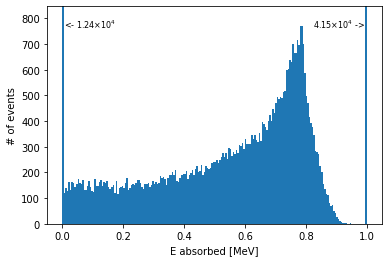

In [10]:
SimpleHistogram(data["Energy"])

(0, 1500)

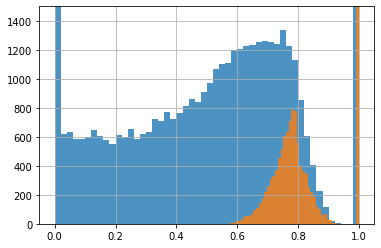

In [133]:
asd = data.groupby(pd.cut(data["Track_length"], [-np.inf, 0.8, np.inf]))
asd["Energy"].hist(stacked=True, alpha=0.8, bins=50)
plt.ylim(0, 1500)

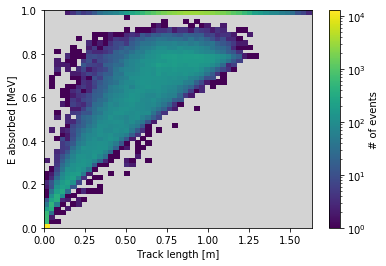

In [135]:
plot_L_vs_E(data)

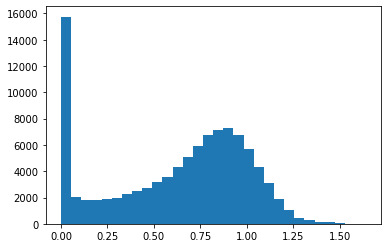

In [136]:
plt.hist(data["Track_length"], bins=30);

In [137]:
from scipy.stats import binned_statistic

avg, edges, _ = binned_statistic(data["Energy"], data["Track_length"], 'mean', bins=50)
x_ = edges[:-1]

/home/balazzs/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Average track length')

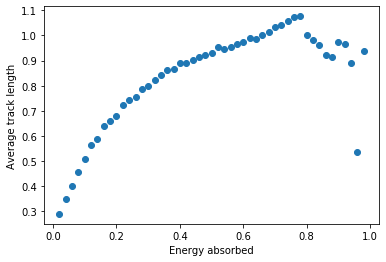

In [138]:
plt.plot(x_, avg/x_, "o")
plt.xlabel("Energy absorbed")
plt.ylabel("Average track length")

# Different physics

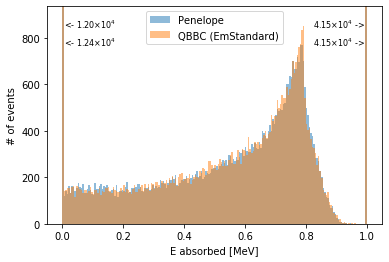

In [234]:
data_penelope = read_file("1MeV_cylinder_penelope/")
data_QBBC     = read_file("1MeV_cylinder_QBBC/")
SimpleHistogram(data_penelope["Energy"], alpha=0.5, label="Penelope")
SimpleHistogram(data_QBBC["Energy"]    , alpha=0.5, label="QBBC (EmStandard)")

plt.legend()

plt.savefig("physics_1MeV.svg")

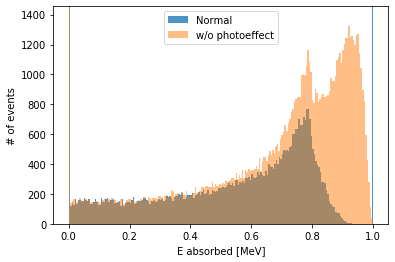

In [275]:
data_no_photo = read_file("1MeV_nophotoeffect_penelope/")
SimpleHistogram(data_penelope["Energy"], do_texts=False, alpha=0.8, label="Normal")
SimpleHistogram(data_no_photo["Energy"], do_texts=False, alpha=0.5, label="w/o photoeffect")
plt.legend();

plt.savefig("photoeffect.svg")

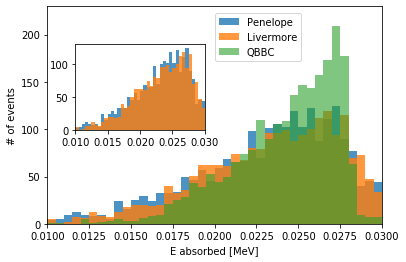

In [272]:
data_penelope_100kev  = read_file("100keV_penelope/")
data_QBBC_100kev      = read_file("100keV_QBBC/")
data_livermore_100kev = read_file("100keV_livermore/")

SimpleHistogram(data_penelope_100kev["Energy"] , do_texts=False, alpha=0.8, label="Penelope")
SimpleHistogram(data_livermore_100kev["Energy"], do_texts=False, alpha=0.8, label="Livermore")
SimpleHistogram(data_QBBC_100kev["Energy"]     , do_texts=False, alpha=0.6, label="QBBC")

plt.xlim(0.01, 0.03)
plt.legend(loc=(.5, .75))


left, bottom, width, height = [0.19, 0.45, 0.3, 0.3]
ax2 = plt.gcf().add_axes([left, bottom, width, height])
SimpleHistogram(data_penelope_100kev["Energy"] , do_texts=False, alpha=0.8, label="Penelope")
SimpleHistogram(data_livermore_100kev["Energy"], do_texts=False, alpha=0.8, label="Livermore")
plt.xlim(0.01, 0.03)
plt.ylabel("");
plt.xlabel("");

plt.savefig("physics_100keV.svg")

# Exit angle

## Absorbed energy angle dependence

In [63]:
def read_with_angle (dir_name):
    data_with_angle = read_file(dir_name, column_names=["Energy", "Track_length", "p_X", "p_Y", "p_Z"])
    data_with_angle["angle"] = np.arccos(np.dot(data_with_angle[["p_X", "p_Y", "p_Z"]], [0,0,1]))
    return data_with_angle

In [67]:
def make_angle_vs_energy_plot (data):
    sub_data = data[np.logical_and(data["Energy"] != data["Energy"].max(), data["Energy"] != 0.0)]
    
    plt.hist2d(sub_data["angle"], sub_data["Energy"], bins=30, norm=LogNorm());
    cbar = plt.colorbar()
    
    plt.xlabel("Exit angle [rad]")
    plt.ylabel("Absorbed energy [MeV]")
    cbar.set_label("# of events")

In [98]:
data_10MeV_angle  = read_with_angle("exit_angle/10MeV/")
data_1MeV_angle   = read_with_angle("exit_angle/1MeV/")
data_511keV_angle = read_with_angle("exit_angle/511keV/")
data_250keV_angle = read_with_angle("exit_angle/250keV/")
data_100keV_angle = read_with_angle("exit_angle/100keV/")

In [297]:
def e_dep(E, theta):
    m_e = 511e3
    return E * (1 - 1 / (1 + (E / m_e) * (1 - np.cos(theta))))

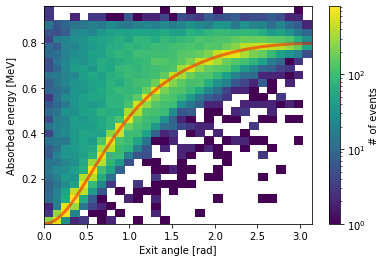

In [313]:
make_angle_vs_energy_plot(data_1MeV_angle)

X = np.linspace(0,3.14, 100)
plt.plot(X, e_dep(1e6, X)/1e6, color="red", alpha=0.5, lw=3)

plt.savefig("exit_angle_distribution.svg")

## Exit direction distribution

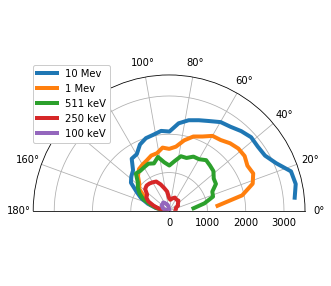

In [316]:
#exit direction distribution
plt.figure(figsize=(5,5))

vals, bins = np.histogram(data_10MeV_angle["angle"], bins=30)
plt.polar(bins[1:-1], vals[1:], lw=4, label="10 Mev")
vals, bins = np.histogram(data_1MeV_angle["angle"], bins=30)
plt.polar(bins[1:-1], vals[1:], lw=4, label="1 Mev")
vals, bins = np.histogram(data_511keV_angle["angle"], bins=30)
plt.polar(bins[1:-1], vals[1:], lw=4, label="511 keV")
vals, bins = np.histogram(data_250keV_angle["angle"], bins=30)
plt.polar(bins[1:-1], vals[1:], lw=4, label="250 keV")
vals, bins = np.histogram(data_100keV_angle["angle"], bins=30)
plt.polar(bins[1:-1], vals[1:], lw=4, label="100 keV")

plt.gca().set_thetamax(180)
plt.yticks([0, 1000, 2000, 3000])
plt.legend(loc= (0.0, 0.5), framealpha=1);

plt.savefig("exit_angle_polar.svg", bbox_inches="tight")

# World changed to air from vacuum

# Particla gun -> source

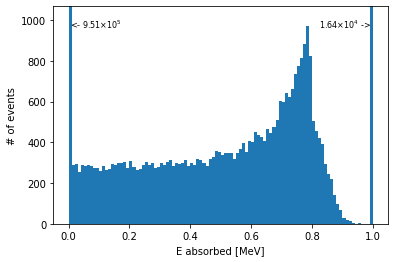

In [254]:
data_source = read_with_angle("distance/5/")
SimpleHistogram(data_source["Energy"], bin_num=100)

# Distance

In [268]:
def read_distance_vs_hits():
    dists = list(range(0, 20)) + list(range(20, 100, 5))
    hits  = []

    for dist in dists:
        data = read_with_angle ("./distance/%i/" % dist)
        hits.append((data["Energy"] > data["Energy"].max() * 0.95).sum())
    return dists, hists

dists, hits = read_distance_vs_hits()

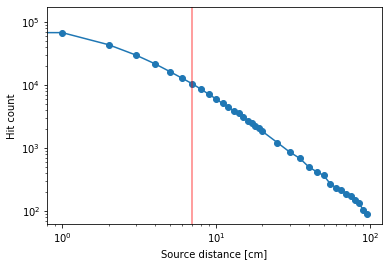

In [290]:
plt.plot(dists, hits, "o-")
plt.axvline(7, color="red", alpha=0.5)

plt.yscale("log")
plt.xscale("log")
plt.xlabel("Source distance [cm]")
plt.ylabel("Hit count")
plt.savefig("distance_vs_hits.svg")

# Radioactive decay - U238 with G4VRadioactiveDecayPhysics

In [386]:
table_u238 = [[0.0465, 0.02083309047],
[0.05323, 0.005229105709],
[0.06329, 0.0185340432],
[0.067672, 0.001740720448],
[0.09238, 0.01259814018],
[0.0928, 0.01244781785],
[0.18599, 0.01518500817],
[0.24191, 0.03450367185],
[0.2588, 0.002143049092],
[0.2952, 0.08882905708],
[0.3519, 0.1708017126],
[0.3891, 0.001620008893],
[0.45477, 0.001666290761],
[0.4805, 0.001543005161],
[0.48725, 0.00150013529],
[0.5802, 0.001628731013],
[0.609318, 0.2170808027],
[0.66545, 0.00731324808],
[0.7031, 0.002082869238],
[0.7198, 0.001805154883],
[0.76836, 0.02300403739],
[0.78595, 0.003900431383],
[0.7861, 0.001434858273],
[0.80617, 0.005924560565],
[0.83903, 0.002657334763],
[0.93405, 0.01476519825],
[0.9641, 0.001758854496],
[1.00102, 0.002727884867],
[1.05196, 0.001527445157],
[1.07, 0.001342299167],
[1.12028, 0.07174314514],
[1.15519, 0.00800745295],
[1.2077, 0.002175368159],
[1.2381, 0.02823351346],
[1.28096, 0.006803948461],
[1.37765, 0.01897718618],
[1.3853, 0.00388791764],
[1.4015, 0.006387379243],
[1.40798, 0.01157148548],
[1.5092, 0.01018284426],
[1.5385, 0.001805154883],
[1.54332, 0.00185143675],
[1.5832, 0.003564032527],
[1.5947, 0.001295994151],
[1.5993, 0.001666290761],
[1.66128, 0.005276605155],
[1.7296, 0.01388581035],
[1.7645, 0.0749838481],
[1.8384, 0.001712572628],
[1.8474, 0.009997661231],
[2.1185, 0.005785626999],
[2.2041, 0.0243000408],
[2.2934, 0.001573727025],
[2.4477, 0.00749838481]]

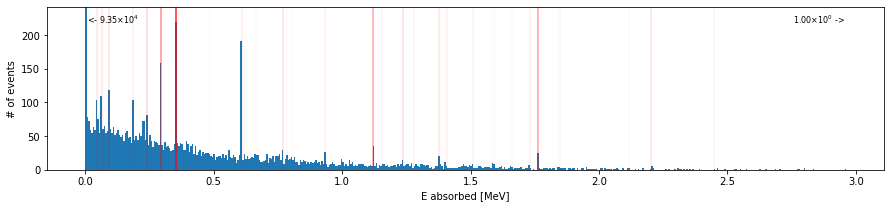

In [398]:
data = read_with_angle("./")

plt.figure(figsize=(15, 3))

for x_, freq in table_u238:
    plt.axvline(x_, color="red", alpha=freq*5)

SimpleHistogram(data["Energy"], bin_num=500)

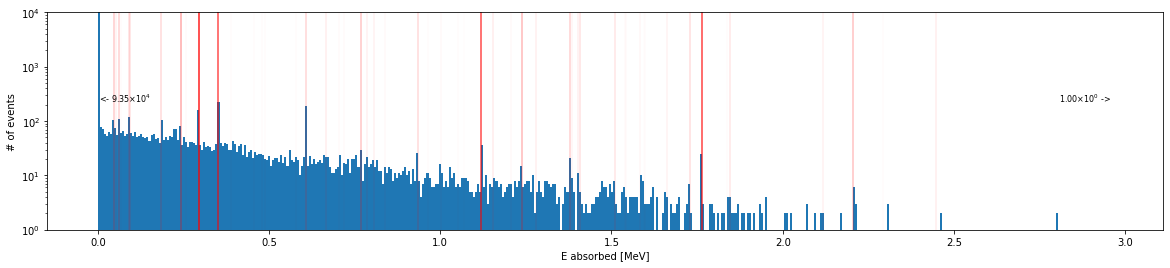

In [399]:
plt.figure(figsize=(20,4))
SimpleHistogram(data["Energy"], bin_num=500)
plt.yscale("log")
plt.ylim(1,10000)

for x_, freq in table_u238:
    plt.axvline(x_, color="red", alpha=freq*10)